In [10]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F
train = open('Training.txt','r').read().splitlines()
test = open('test.txt').read().splitlines()
words = test

In [152]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
import random

# Set paths
input_path = "words.txt"  # or the full path if needed
output_path = "test.txt"

# Read all words
with open(input_path, "r") as f:
    all_words = [line.strip() for line in f if line.strip()]

# Randomly sample 30,000 unique words
random.seed(42)  # for reproducibility
sampled_words = random.sample(all_words, 10000)

# Write to new file
with open(output_path, "w") as f:
    for word in sampled_words:
        f.write(word + "\n")

print(f"Saved 30,000 words to {output_path}")

In [11]:
words[:20]

['unarraigned',
 'cirsotomy',
 'anilau',
 'hoss',
 'government',
 'forestalling',
 'cripplers',
 'chemosensitivity',
 'upjet',
 'serapic',
 'camatina',
 'subtransversally',
 'oversoaks',
 'apart',
 'antimonic',
 'castrating',
 'flimsilyst',
 'gantangs',
 'refective',
 'talyshin']

In [12]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [13]:
N = torch.zeros((27,27), dtype=torch.int32)

In [15]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
    
        N[ix1,ix2] += 1

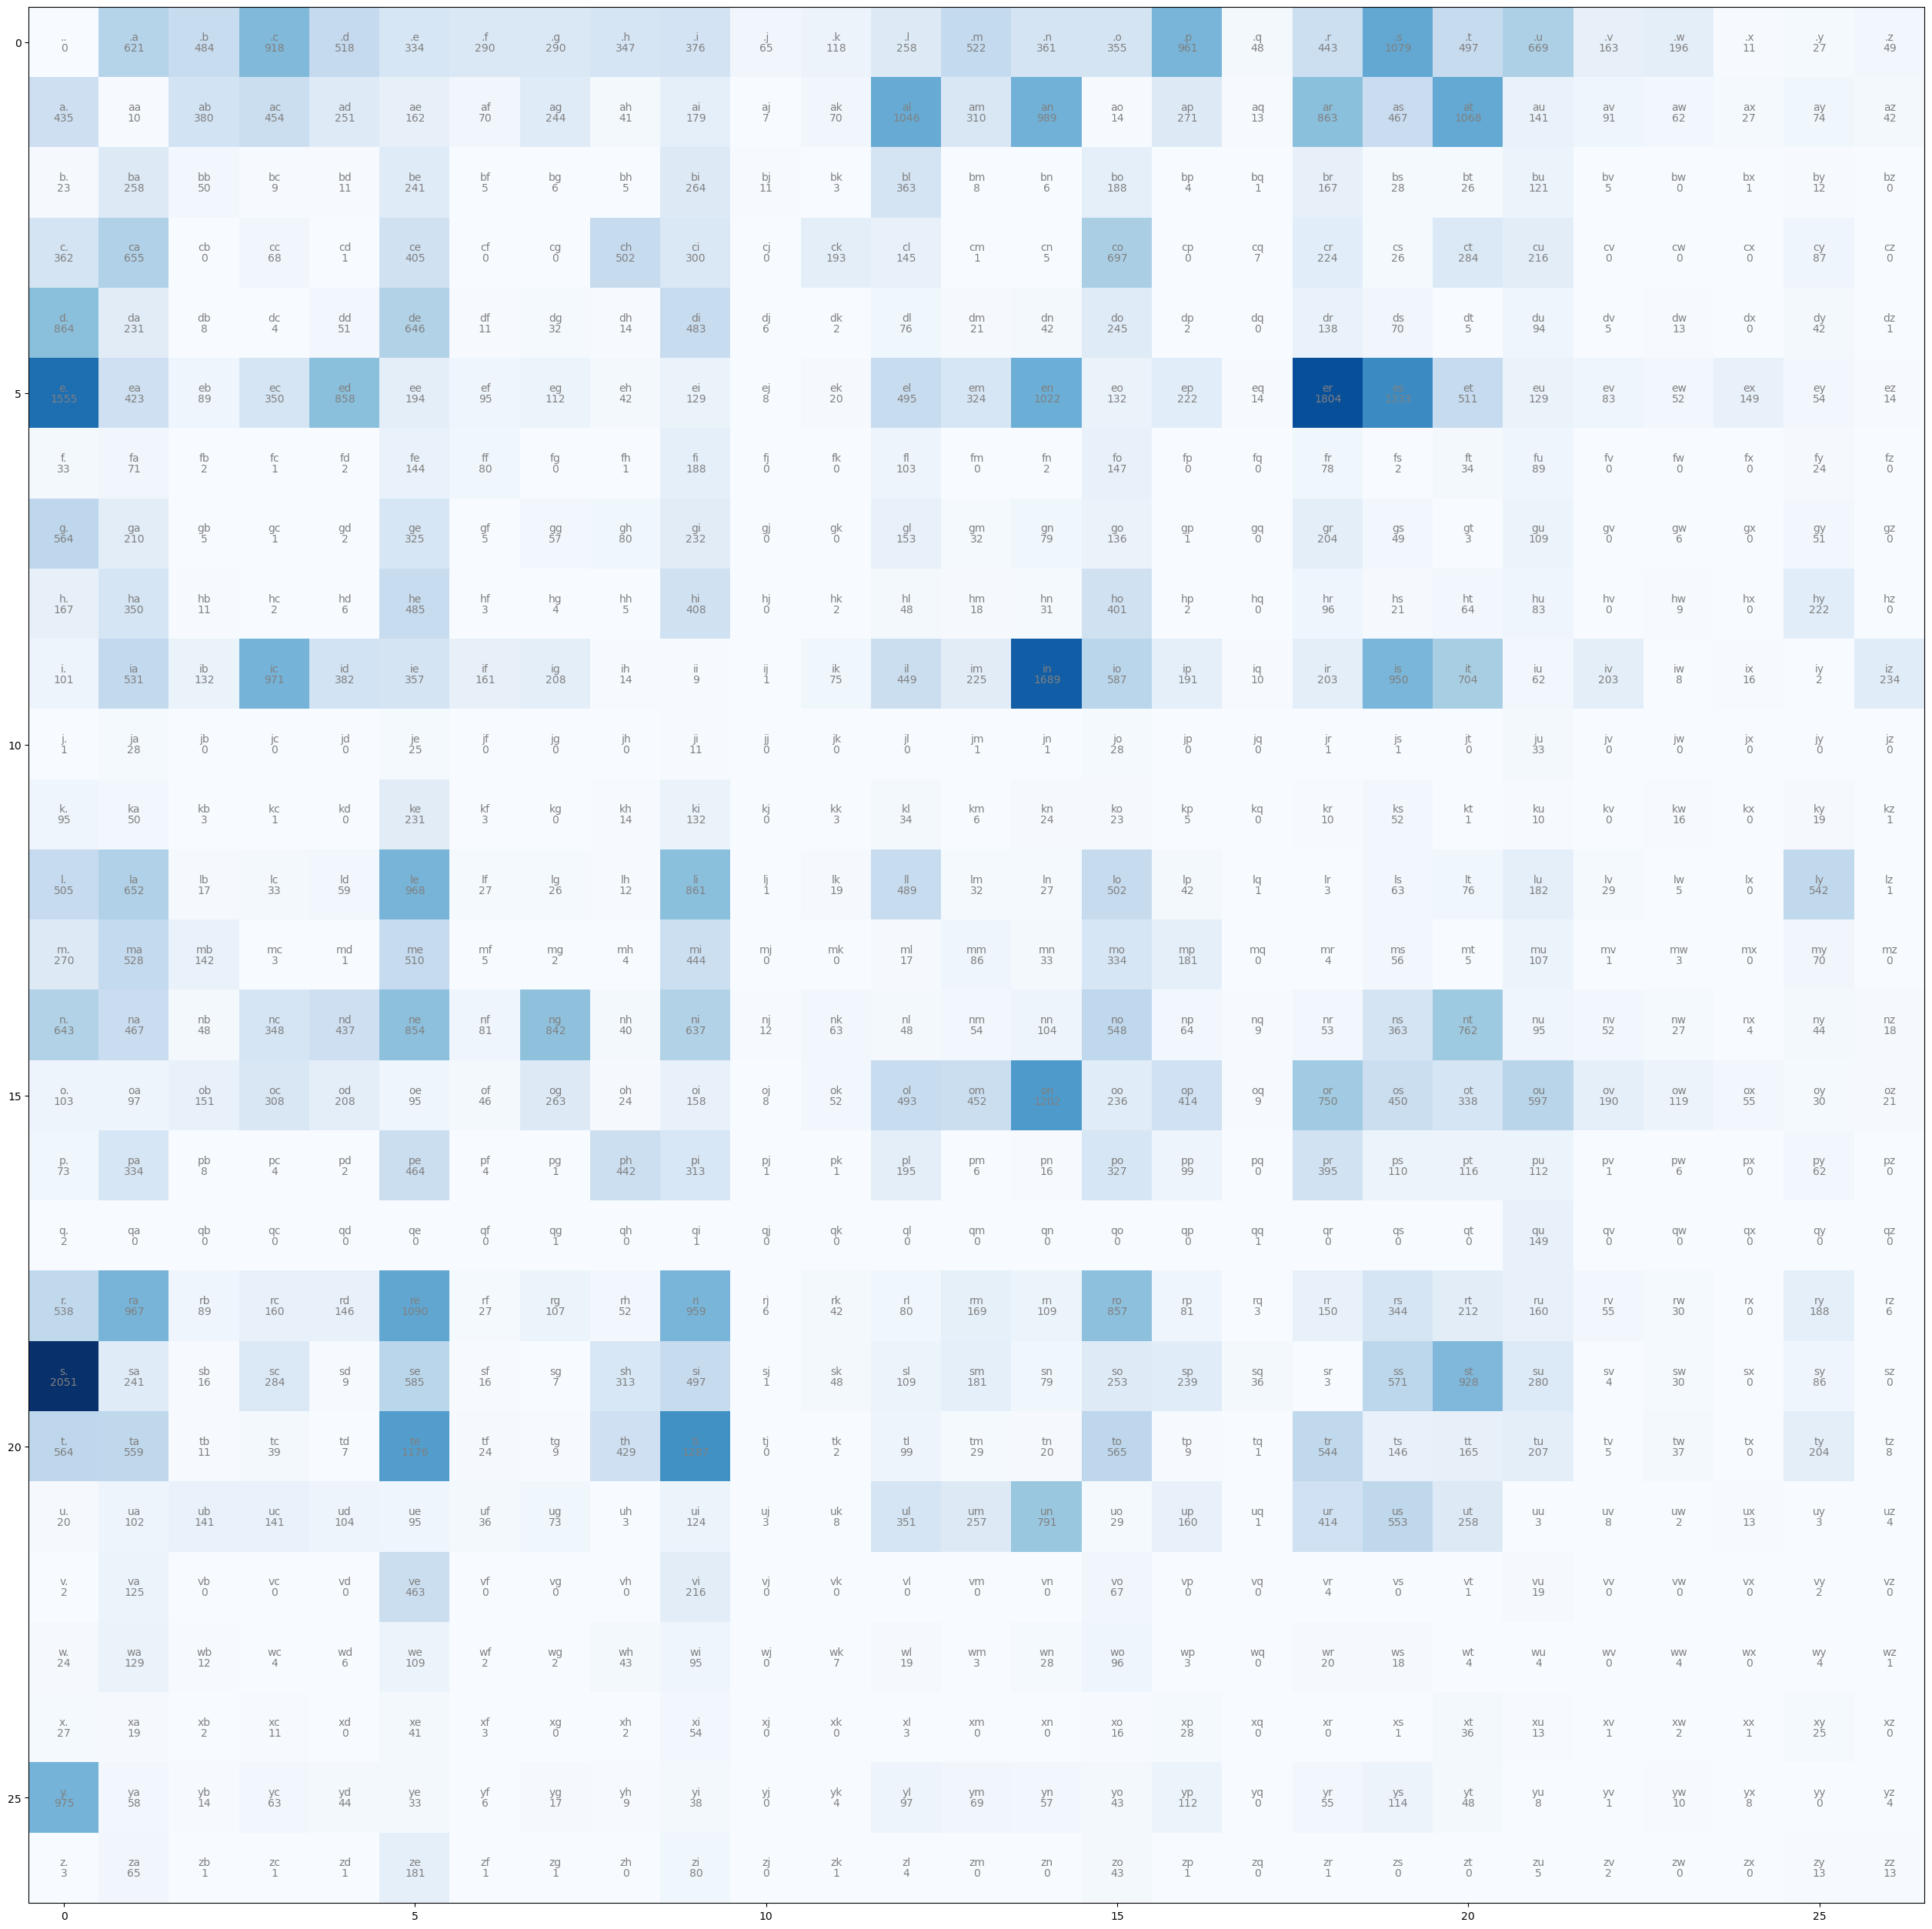

In [16]:
plt.figure(figsize = (32,32))
plt.imshow(N,cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr, ha="center", va="bottom", color='gray')
        plt.text(j,i,N[i,j].item(),ha="center", va="top", color='gray')

In [17]:
## Model smoothing
P = (N+1).float()
P /= P.sum(1, keepdim=True)



In [18]:
i = 0


for x in range(50):
    out = []
    while True:
        p = P[i]
        i = torch.multinomial(p,num_samples = 1, replacement=True).item()
        out.append(itos[i])
        if i==0: 
            break
    print(''.join(out))

tes.
qurvinftomaexisurtangupr.
vaundity.
uavet.
prcustcalokefrom.
usmaurpatifor.
ntumpingsconpotholeri.
aves.
bleleltrg.
urilem.
ding.
ram.
s.
urg.
anancoremporagg.
d.
nbangrtyssisombanoober.
menntelons.
rchoearagrm.
cumorremllminilunselexarchays.
ctusulys.
detoubountrsioorunevedentecite.
whisy.
ogl.
sesepedred.
gridriajer.
necisellsphedionge.
cularobelmbobrogarsme.
mpongerrrpprinouobocrobafosdeduenpaly.
d.
d.
binbs.
cat.
sely.
dis.
hont.
ccopesin.
tespuantig.
sting.
cesatelalat.
dle.
sthafthussstha.
oruimispral.
demeres.
arextesisicesilles.
squphemes.
gngimiematempescantomig.
ulpitapiatweterinyd.
chnnepeis.
flherictoratil.


In [123]:
log_likelyhood = 0.0
n = 0

for w in train:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_likelyhood += torch.log(prob)
        logprob = torch.log(prob)
        n+= 1
#         print(f'{ch1}{ch2}: {prob:4f}: {logprob:4f}')

        
# print(log_likelyhood)
nll = -log_likelyhood
normnll = nll/n



xs, ys = [], []


for w in train[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
train[:1]


xenc = F.one_hot(xs, num_classes = 27).float()
xenc
plt.imshow(xenc)


W = torch.rand((27,27),requires_grad=True)

#Forwar pass

xenc = F.one_hot(xs, num_classes = 27).float()
logits = (xenc @ W).exp()
counts = logits.exp()
probs= counts/counts.sum(1, keepdims=True)
loss = -probs[torch.arange(12), ys].log().mean()
# backward pass
W.grad = None

loss.backward()

#ADjustment
W.data += -0.1 * W.grad

.u: 0.066820: -2.705759
un: 0.212675: -1.547992
na: 0.069395: -2.667940
ar: 0.110656: -2.201331
rr: 0.022693: -3.785694
ra: 0.145476: -1.927741
ai: 0.023053: -3.769947
ig: 0.024582: -3.705723
gn: 0.034320: -3.372026
ne: 0.126779: -2.065307
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.c: 0.091653: -2.389751
ci: 0.071581: -2.636919
ir: 0.023994: -3.729937
rs: 0.051849: -2.959429
so: 0.036844: -3.301073
ot: 0.049159: -3.012697
to: 0.091690: -2.389346
om: 0.065690: -2.722805
my: 0.025062: -3.686412
y.: 0.509927: -0.673488
.a: 0.062033: -2.780097
an: 0.126793: -2.065199
ni: 0.094603: -2.358070
il: 0.052929: -2.938809
la: 0.125553: -2.075029
au: 0.018186: -4.007077
u.: 0.005639: -5.178031
.h: 0.034706: -3.360834
ho: 0.163083: -1.813495
os: 0.065400: -2.727229
ss: 0.082971: -2.489268
s.: 0.297650: -1.211837
.g: 0.029022: -3.539713
go: 0.058773: -2.834072
ov: 0.027697: -3.586423
ve: 0.501080: -0.690990
er: 0.176270: -1.735741
rn: 0.016531: -4.102493
nm: 0.008155: -4.809075
me: 0.180374: -1

.s: 0.107709: -2.228320
sp: 0.034813: -3.357768
po: 0.105162: -2.252254
or: 0.108904: -2.217291
ri: 0.144274: -1.936040
ip: 0.022583: -3.790561
pa: 0.107406: -2.231137
ar: 0.110656: -2.201331
ri: 0.144274: -1.936040
it: 0.082922: -2.489859
ty: 0.033209: -3.404930
y.: 0.509927: -0.673488
.i: 0.037598: -3.280792
im: 0.026582: -3.627522
mp: 0.064243: -2.745085
pr: 0.126964: -2.063854
re: 0.163962: -1.808123
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
si: 0.072237: -2.627807
io: 0.069160: -2.671330
on: 0.174449: -1.746123
na: 0.069395: -2.667940
al: 0.134093: -2.009220
l.: 0.097289: -2.330070
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
re: 0.163962: -1.808123
ec: 0.034277: -3.373271
ci: 0.071581: -2.636919
io: 0.069160: -2.671330
ou: 0.086717: -2.445106
us: 0.148765: -1.905389
se: 0.085001: -2.465087
es: 0.130273: -2.038120
s.: 0.297650: -1.211837
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
ro: 0.128945: -2.048369
oa: 0.014211: -4.253729
as: 0.059939: -2.814436
ss: 0.082971: -2

se: 0.085001: -2.465087
e.: 0.151953: -1.884183
.s: 0.107709: -2.228320
si: 0.072237: -2.627807
im: 0.026582: -3.627522
mb: 0.050477: -2.986247
bi: 0.143787: -1.939420
il: 0.052929: -2.938809
l.: 0.097289: -2.330070
.c: 0.091653: -2.389751
ch: 0.119620: -2.123439
he: 0.197160: -1.623738
em: 0.031738: -3.450232
mu: 0.038122: -3.266960
ur: 0.111439: -2.194275
rg: 0.016231: -4.120842
gi: 0.099957: -2.303014
ic: 0.114326: -2.168701
ca: 0.156005: -1.857869
al: 0.134093: -2.009220
ll: 0.094213: -2.362201
ly: 0.104403: -2.259497
y.: 0.509927: -0.673488
.r: 0.044280: -3.117212
re: 0.163962: -1.808123
et: 0.050000: -2.995732
ti: 0.208651: -1.567094
im: 0.026582: -3.627522
mi: 0.157077: -1.851017
in: 0.198777: -1.615573
ng: 0.125000: -2.079442
g.: 0.242385: -1.417227
.c: 0.091653: -2.389751
co: 0.165993: -1.795810
on: 0.174449: -1.746123
nc: 0.051750: -2.961337
cl: 0.034721: -3.360423
lu: 0.035186: -3.347120
ud: 0.028195: -3.568593
de: 0.206511: -1.577400
en: 0.099902: -2.303562
nt: 0.113138: -2

om: 0.065690: -2.722805
me: 0.180374: -1.712722
en: 0.099902: -2.303562
nt: 0.113138: -2.179151
ti: 0.208651: -1.567094
in: 0.198777: -1.615573
ng: 0.125000: -2.079442
g.: 0.242385: -1.417227
.d: 0.051760: -2.961133
da: 0.074050: -2.603009
am: 0.039831: -3.223111
ma: 0.186728: -1.678103
ag: 0.031378: -3.461646
ge: 0.139854: -1.967155
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.a: 0.062033: -2.780097
al: 0.134093: -2.009220
lk: 0.003845: -5.560874
ky: 0.026316: -3.637586
yl: 0.051202: -2.971983
li: 0.165737: -1.797351
ic: 0.114326: -2.168701
c.: 0.086326: -2.449627
.h: 0.034706: -3.360834
he: 0.197160: -1.623738
ep: 0.021777: -3.826885
pa: 0.107406: -2.231137
at: 0.136911: -1.988425
to: 0.091690: -2.389346
op: 0.060180: -2.810418
pt: 0.037512: -3.283094
to: 0.091690: -2.389346
os: 0.065400: -2.727229
si: 0.072237: -2.627807
ia: 0.062574: -2.771413
a.: 0.055840: -2.885262
.s: 0.107709: -2.228320
si: 0.072237: -2.627807
ig: 0.024582: -3.705723
gn: 0.034320: -3.372026
na: 0.069395: -2

ap: 0.034836: -3.357102
pa: 0.107406: -2.231137
al: 0.134093: -2.009220
lo: 0.096712: -2.336016
o.: 0.015081: -4.194306
.a: 0.062033: -2.780097
as: 0.059939: -2.814436
sh: 0.045547: -3.089014
he: 0.197160: -1.623738
et: 0.050000: -2.995732
t.: 0.091528: -2.391114
.f: 0.029022: -3.539713
fi: 0.183852: -1.693623
il: 0.052929: -2.938809
lm: 0.006345: -5.060099
me: 0.180374: -1.712722
et: 0.050000: -2.995732
t.: 0.091528: -2.391114
.l: 0.025830: -3.656209
li: 0.165737: -1.797351
ie: 0.042108: -3.167524
en: 0.099902: -2.303562
nt: 0.113138: -2.179151
te: 0.190669: -1.657216
er: 0.176270: -1.735741
ri: 0.144274: -1.936040
ia: 0.062574: -2.771413
a.: 0.055840: -2.885262
.d: 0.051760: -2.961133
de: 0.206511: -1.577400
eb: 0.008789: -4.734247
be: 0.131308: -2.030212
en: 0.099902: -2.303562
nz: 0.002817: -5.871970
zo: 0.099099: -2.311635
ol: 0.071636: -2.636161
li: 0.165737: -1.797351
iz: 0.027641: -3.588471
ze: 0.409910: -0.891818
e.: 0.151953: -1.884183
.c: 0.091653: -2.389751
ca: 0.156005: -1

in: 0.198777: -1.615573
ne: 0.126779: -2.065307
e.: 0.151953: -1.884183
.s: 0.107709: -2.228320
sh: 0.045547: -3.089014
ha: 0.142394: -1.949161
ag: 0.031378: -3.461646
gg: 0.024882: -3.693610
gi: 0.099957: -2.303014
in: 0.198777: -1.615573
ne: 0.126779: -2.065307
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
s.: 0.297650: -1.211837
.r: 0.044280: -3.117212
ro: 0.128945: -2.048369
oc: 0.044809: -3.105356
ck: 0.046136: -3.076171
ke: 0.305263: -1.186581
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.m: 0.052159: -2.953455
mu: 0.038122: -3.266960
us: 0.148765: -1.905389
si: 0.072237: -2.627807
ic: 0.114326: -2.168701
co: 0.165993: -1.795810
ot: 0.049159: -3.012697
th: 0.069658: -2.664155
he: 0.197160: -1.623738
er: 0.176270: -1.735741
ra: 0.145476: -1.927741
ap: 0.034836: -3.357102
pi: 0.100673: -2.295875
ie: 0.042108: -3.167524
es: 0.130273: -2.038120
s.: 0.297650: -1.211837
.w: 0.019647: -3.929833
wr: 0.031627: -3.453760
ro: 0.128945: -2.048369
on: 0.174449: -1.746123
ng: 0.125000: -2

si: 0.072237: -2.627807
iv: 0.023994: -3.729937
ve: 0.501080: -0.690990
en: 0.099902: -2.303562
ne: 0.126779: -2.065307
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
s.: 0.297650: -1.211837
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
re: 0.163962: -1.808123
ei: 0.012695: -4.366522
in: 0.198777: -1.615573
nh: 0.006079: -5.102837
ha: 0.142394: -1.949161
ab: 0.048796: -3.020105
bi: 0.143787: -1.939420
it: 0.082922: -2.489859
t.: 0.091528: -2.391114
.a: 0.062033: -2.780097
ae: 0.020876: -3.869154
er: 0.176270: -1.735741
ro: 0.128945: -2.048369
op: 0.060180: -2.810418
ph: 0.142033: -1.951698
hy: 0.090467: -2.402775
yt: 0.025601: -3.665130
te: 0.190669: -1.657216
e.: 0.151953: -1.884183
.d: 0.051760: -2.961133
dr: 0.044366: -3.115272
ra: 0.145476: -1.927741
ag: 0.031378: -3.461646
go: 0.058773: -2.834072
oo: 0.034368: -3.370637
on: 0.174449: -1.746123
ns: 0.053974: -2.919255
s.: 0.297650: -1.211837
.o: 0.035504: -3.338106
ov: 0.027697: -3.586423
ve: 0.501080: -0.690990
er: 0.176270: -1

ke: 0.305263: -1.186581
e.: 0.151953: -1.884183
.r: 0.044280: -3.117212
ra: 0.145476: -1.927741
as: 0.059939: -2.814436
so: 0.036844: -3.301073
op: 0.060180: -2.810418
ph: 0.142033: -1.951698
ho: 0.163083: -1.813495
or: 0.108904: -2.217291
re: 0.163962: -1.808123
e.: 0.151953: -1.884183
.r: 0.044280: -3.117212
re: 0.163962: -1.808123
ea: 0.041406: -3.184323
ac: 0.058274: -2.842607
cc: 0.016409: -4.109923
ce: 0.096552: -2.337677
en: 0.099902: -2.303562
nt: 0.113138: -2.179151
tu: 0.033695: -3.390402
ua: 0.027658: -3.587825
at: 0.136911: -1.988425
te: 0.190669: -1.657216
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.s: 0.107709: -2.228320
se: 0.085001: -2.465087
em: 0.031738: -3.450232
mi: 0.157077: -1.851017
is: 0.111856: -2.190543
sh: 0.045547: -3.089014
he: 0.197160: -1.623738
ee: 0.019043: -3.961057
er: 0.176270: -1.735741
r.: 0.081004: -2.513258
.a: 0.062033: -2.780097
ac: 0.058274: -2.842607
cr: 0.053508: -2.927929
ro: 0.128945: -2.048369
op: 0.060180: -2.810418
po: 0.105162: -2

s.: 0.297650: -1.211837
.v: 0.016356: -4.113170
vi: 0.234341: -1.450977
ia: 0.062574: -2.771413
at: 0.136911: -1.988425
to: 0.091690: -2.389346
om: 0.065690: -2.722805
me: 0.180374: -1.712722
et: 0.050000: -2.995732
te: 0.190669: -1.657216
er: 0.176270: -1.735741
r.: 0.081004: -2.513258
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
re: 0.163962: -1.808123
ep: 0.021777: -3.826885
pa: 0.107406: -2.231137
ac: 0.058274: -2.842607
ck: 0.046136: -3.076171
ks: 0.069737: -2.663027
s.: 0.297650: -1.211837
.r: 0.044280: -3.117212
ra: 0.145476: -1.927741
ar: 0.110656: -2.201331
ri: 0.144274: -1.936040
if: 0.019054: -3.960460
fy: 0.024319: -3.716495
yi: 0.020376: -3.893389
in: 0.198777: -1.615573
ng: 0.125000: -2.079442
g.: 0.242385: -1.417227
.d: 0.051760: -2.961133
dr: 0.044366: -3.115272
ra: 0.145476: -1.927741
ab: 0.048796: -3.020105
bb: 0.027672: -3.587324
bl: 0.197504: -1.621996
li: 0.165737: -1.797351
in: 0.198777: -1.615573
ng: 0.125000: -2.079442
g.: 0.242385: -1.417227
.d: 0.051760: -2

s.: 0.297650: -1.211837
.o: 0.035504: -3.338106
op: 0.060180: -2.810418
ph: 0.142033: -1.951698
hi: 0.165923: -1.796232
io: 0.069160: -2.671330
on: 0.174449: -1.746123
ni: 0.094603: -2.358070
id: 0.045048: -3.100022
d.: 0.276093: -1.287017
.m: 0.052159: -2.953455
my: 0.025062: -3.686412
yt: 0.025601: -3.665130
th: 0.069658: -2.664155
ho: 0.163083: -1.813495
ol: 0.071636: -2.636161
lo: 0.096712: -2.336016
og: 0.038283: -3.262748
gi: 0.099957: -2.303014
iz: 0.027641: -3.588471
ze: 0.409910: -0.891818
er: 0.176270: -1.735741
r.: 0.081004: -2.513258
.u: 0.066820: -2.705759
un: 0.212675: -1.547992
ns: 0.053974: -2.919255
st: 0.134755: -2.004298
tr: 0.088288: -2.427155
re: 0.163962: -1.808123
ea: 0.041406: -3.184323
am: 0.039831: -3.223111
me: 0.180374: -1.712722
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.u: 0.066820: -2.705759
un: 0.212675: -1.547992
ni: 0.094603: -2.358070
in: 0.198777: -1.615573
ns: 0.053974: -2.919255
su: 0.040760: -3.200052
ul: 0.094522: -2.358922
la: 0.125553: -2

at: 0.136911: -1.988425
te: 0.190669: -1.657216
e.: 0.151953: -1.884183
.s: 0.107709: -2.228320
sa: 0.035103: -3.349469
at: 0.136911: -1.988425
tu: 0.033695: -3.390402
ur: 0.111439: -2.194275
ra: 0.145476: -1.927741
at: 0.136911: -1.988425
ti: 0.208651: -1.567094
in: 0.198777: -1.615573
ng: 0.125000: -2.079442
g.: 0.242385: -1.417227
.d: 0.051760: -2.961133
du: 0.030322: -3.495869
un: 0.212675: -1.547992
nt: 0.113138: -2.179151
te: 0.190669: -1.657216
er: 0.176270: -1.735741
r.: 0.081004: -2.513258
.a: 0.062033: -2.780097
am: 0.039831: -3.223111
mb: 0.050477: -2.986247
ba: 0.140532: -1.962322
as: 0.059939: -2.814436
ss: 0.082971: -2.489268
sy: 0.012620: -4.372499
y.: 0.509927: -0.673488
.h: 0.034706: -3.360834
ho: 0.163083: -1.813495
os: 0.065400: -2.727229
sp: 0.034813: -3.357768
pi: 0.100673: -2.295875
ic: 0.114326: -2.168701
ce: 0.096552: -2.337677
e.: 0.151953: -1.884183
.e: 0.033410: -3.398906
ex: 0.014648: -4.223422
xp: 0.092949: -2.375707
pl: 0.062841: -2.767153
lo: 0.096712: -2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



iz: 0.027641: -3.588471
ze: 0.409910: -0.891818
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.n: 0.036103: -3.321393
no: 0.081406: -2.508310
on: 0.174449: -1.746123
ne: 0.126779: -2.065307
ex: 0.014648: -4.223422
xp: 0.092949: -2.375707
pr: 0.126964: -2.063854
re: 0.163962: -1.808123
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
si: 0.072237: -2.627807
iv: 0.023994: -3.729937
ve: 0.501080: -0.690990
e.: 0.151953: -1.884183
.j: 0.006582: -5.023382
ja: 0.184713: -1.688950
ap: 0.034836: -3.357102
pa: 0.107406: -2.231137
an: 0.126793: -2.065199
ni: 0.094603: -2.358070
iz: 0.027641: -3.588471
ze: 0.409910: -0.891818
ed: 0.083887: -2.478288
d.: 0.276093: -1.287017
.r: 0.044280: -3.117212
ra: 0.145476: -1.927741
as: 0.059939: -2.814436
sh: 0.045547: -3.089014
hn: 0.012982: -4.344211
ne: 0.126779: -2.065307
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
se: 0.085001: -2.465087
es: 0.130273: -2.038120
s.: 0.297650: -1.211837
.i: 0.037598: -3.280792
in: 0.198777: -1.615573
nc: 0.051750: -2

ki: 0.175000: -1.742969
in: 0.198777: -1.615573
ng: 0.125000: -2.079442
gn: 0.034320: -3.372026
ne: 0.126779: -2.065307
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
s.: 0.297650: -1.211837
.d: 0.051760: -2.961133
di: 0.154485: -1.867661
ip: 0.022583: -3.790561
pn: 0.005450: -5.212054
no: 0.081406: -2.508310
oa: 0.014211: -4.253729
an: 0.126793: -2.065199
n.: 0.095492: -2.348710
.q: 0.004887: -5.321217
qu: 0.828729: -0.187862
ua: 0.027658: -3.587825
ag: 0.031378: -3.461646
gm: 0.014157: -4.257545
mi: 0.157077: -1.851017
ir: 0.023994: -3.729937
ry: 0.028404: -3.561226
y.: 0.509927: -0.673488
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
ro: 0.128945: -2.048369
of: 0.006816: -4.988549
fi: 0.183852: -1.693623
ic: 0.114326: -2.168701
ci: 0.071581: -2.636919
ie: 0.042108: -3.167524
en: 0.099902: -2.303562
nc: 0.051750: -2.961337
ci: 0.071581: -2.636919
ie: 0.042108: -3.167524
es: 0.130273: -2.038120
s.: 0.297650: -1.211837
.s: 0.107709: -2.228320
sl: 0.015956: -4.137926
li: 0.165737: -1

kk: 0.005263: -5.247024
ko: 0.031579: -3.455265
ok: 0.007686: -4.868405
k.: 0.126316: -2.068970
.p: 0.095941: -2.344022
ph: 0.142033: -1.951698
ho: 0.163083: -1.813495
ot: 0.049159: -3.012697
to: 0.091690: -2.389346
od: 0.030307: -3.496362
dy: 0.013725: -4.288546
yn: 0.030303: -3.496508
na: 0.069395: -2.667940
am: 0.039831: -3.223111
mi: 0.157077: -1.851017
ic: 0.114326: -2.168701
ca: 0.156005: -1.857869
al: 0.134093: -2.009220
ll: 0.094213: -2.362201
ly: 0.104403: -2.259497
y.: 0.509927: -0.673488
.o: 0.035504: -3.338106
oe: 0.013921: -4.274349
es: 0.130273: -2.038120
so: 0.036844: -3.301073
op: 0.060180: -2.810418
ph: 0.142033: -1.951698
ha: 0.142394: -1.949161
ag: 0.031378: -3.461646
ga: 0.090519: -2.402194
al: 0.134093: -2.009220
l.: 0.097289: -2.330070
.l: 0.025830: -3.656209
lo: 0.096712: -2.336016
oo: 0.034368: -3.370637
os: 0.065400: -2.727229
se: 0.085001: -2.465087
es: 0.130273: -2.038120
st: 0.134755: -2.004298
tr: 0.088288: -2.427155
ri: 0.144274: -1.936040
if: 0.019054: -3

.b: 0.048369: -3.028888
bo: 0.102550: -2.277403
or: 0.108904: -2.217291
rd: 0.022092: -3.812541
de: 0.206511: -1.577400
er: 0.176270: -1.735741
rl: 0.012173: -4.408525
li: 0.165737: -1.797351
in: 0.198777: -1.615573
ne: 0.126779: -2.065307
e.: 0.151953: -1.884183
.d: 0.051760: -2.961133
de: 0.206511: -1.577400
em: 0.031738: -3.450232
mi: 0.157077: -1.851017
ip: 0.022583: -3.790561
pi: 0.100673: -2.295875
iq: 0.001294: -6.650161
qu: 0.828729: -0.187862
ue: 0.025779: -3.658206
e.: 0.151953: -1.884183
.c: 0.091653: -2.389751
cy: 0.020927: -3.866693
ya: 0.030825: -3.479413
an: 0.126793: -2.065199
no: 0.081406: -2.508310
oc: 0.044809: -3.105356
ci: 0.071581: -2.636919
it: 0.082922: -2.489859
tt: 0.026891: -3.615952
ta: 0.090718: -2.400003
a.: 0.055840: -2.885262
.p: 0.095941: -2.344022
pa: 0.107406: -2.231137
at: 0.136911: -1.988425
tr: 0.088288: -2.427155
ri: 0.144274: -1.936040
ia: 0.062574: -2.771413
ar: 0.110656: -2.201331
rc: 0.024196: -3.721569
ch: 0.119620: -2.123439
hi: 0.165923: -1

il: 0.052929: -2.938809
le: 0.186310: -1.680342
e.: 0.151953: -1.884183
.d: 0.051760: -2.961133
du: 0.030322: -3.495869
ue: 0.025779: -3.658206
en: 0.099902: -2.303562
nn: 0.015569: -4.162448
na: 0.069395: -2.667940
as: 0.059939: -2.814436
s.: 0.297650: -1.211837
.g: 0.029022: -3.539713
ge: 0.139854: -1.967155
em: 0.031738: -3.450232
mm: 0.030709: -3.483183
mi: 0.157077: -1.851017
ip: 0.022583: -3.790561
pa: 0.107406: -2.231137
ar: 0.110656: -2.201331
ra: 0.145476: -1.927741
a.: 0.055840: -2.885262
.s: 0.107709: -2.228320
se: 0.085001: -2.465087
em: 0.031738: -3.450232
mp: 0.064243: -2.745085
ps: 0.035588: -3.335737
st: 0.134755: -2.004298
tr: 0.088288: -2.427155
ry: 0.028404: -3.561226
yw: 0.005747: -5.159055
wo: 0.146084: -1.923571
or: 0.108904: -2.217291
rk: 0.006462: -5.041773
k.: 0.126316: -2.068970
.o: 0.035504: -3.338106
ob: 0.022042: -3.814816
bt: 0.014650: -4.223313
tu: 0.033695: -3.390402
us: 0.148765: -1.905389
se: 0.085001: -2.465087
el: 0.048437: -3.027481
ly: 0.104403: -2

ce: 0.096552: -2.337677
ea: 0.041406: -3.184323
ae: 0.020876: -3.869154
e.: 0.151953: -1.884183
.t: 0.049666: -3.002437
tr: 0.088288: -2.427155
ri: 0.144274: -1.936040
it: 0.082922: -2.489859
ty: 0.033209: -3.404930
yl: 0.051202: -2.971983
l.: 0.097289: -2.330070
.u: 0.066820: -2.705759
un: 0.212675: -1.547992
nm: 0.008155: -4.809075
me: 0.180374: -1.712722
er: 0.176270: -1.735741
ri: 0.144274: -1.936040
id: 0.045048: -3.100022
di: 0.154485: -1.867661
io: 0.069160: -2.671330
on: 0.174449: -1.746123
na: 0.069395: -2.667940
al: 0.134093: -2.009220
l.: 0.097289: -2.330070
.t: 0.049666: -3.002437
tr: 0.088288: -2.427155
ri: 0.144274: -1.936040
ia: 0.062574: -2.771413
an: 0.126793: -2.065199
ng: 0.125000: -2.079442
gl: 0.066066: -2.717100
le: 0.186310: -1.680342
e.: 0.151953: -1.884183
.h: 0.034706: -3.360834
he: 0.197160: -1.623738
em: 0.031738: -3.450232
me: 0.180374: -1.712722
el: 0.048437: -3.027481
ll: 0.094213: -2.362201
li: 0.165737: -1.797351
it: 0.082922: -2.489859
te: 0.190669: -1

og: 0.038283: -3.262748
ge: 0.139854: -1.967155
eo: 0.012988: -4.343708
ot: 0.049159: -3.012697
tr: 0.088288: -2.427155
ro: 0.128945: -2.048369
op: 0.060180: -2.810418
pi: 0.100673: -2.295875
is: 0.111856: -2.190543
sm: 0.026400: -3.634400
m.: 0.095658: -2.346973
.p: 0.095941: -2.344022
po: 0.105162: -2.252254
ol: 0.071636: -2.636161
ly: 0.104403: -2.259497
ys: 0.060084: -2.812018
sy: 0.012620: -4.372499
yl: 0.051202: -2.971983
ll: 0.094213: -2.362201
lo: 0.096712: -2.336016
og: 0.038283: -3.262748
gi: 0.099957: -2.303014
is: 0.111856: -2.190543
st: 0.134755: -2.004298
ti: 0.208651: -1.567094
ic: 0.114326: -2.168701
c.: 0.086326: -2.449627
.b: 0.048369: -3.028888
bo: 0.102550: -2.277403
od: 0.030307: -3.496362
de: 0.206511: -1.577400
ef: 0.009375: -4.669709
fu: 0.087549: -2.435561
ul: 0.094522: -2.358922
ln: 0.005384: -5.224401
ne: 0.126779: -2.065307
es: 0.130273: -2.038120
ss: 0.082971: -2.489268
s.: 0.297650: -1.211837
.p: 0.095941: -2.344022
pa: 0.107406: -2.231137
ar: 0.110656: -2

it: 0.082922: -2.489859
te: 0.190669: -1.657216
e.: 0.151953: -1.884183
.s: 0.107709: -2.228320
sc: 0.041340: -3.185918
ch: 0.119620: -2.123439
ha: 0.142394: -1.949161
ai: 0.023053: -3.769947
ir: 0.023994: -3.729937
re: 0.163962: -1.808123
er: 0.176270: -1.735741
ri: 0.144274: -1.936040
it: 0.082922: -2.489859
te: 0.190669: -1.657216
e.: 0.151953: -1.884183
.h: 0.034706: -3.360834
he: 0.197160: -1.623738
ei: 0.012695: -4.366522
ir: 0.023994: -3.729937
rl: 0.012173: -4.408525
lo: 0.096712: -2.336016
o.: 0.015081: -4.194306
.o: 0.035504: -3.338106
oc: 0.044809: -3.105356
ct: 0.067776: -2.691540
to: 0.091690: -2.389346
oc: 0.044809: -3.105356
co: 0.165993: -1.795810
or: 0.108904: -2.217291
ra: 0.145476: -1.927741
al: 0.134093: -2.009220
ll: 0.094213: -2.362201
la: 0.125553: -2.075029
a.: 0.055840: -2.885262
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
ri: 0.144274: -1.936040
iv: 0.023994: -3.729937
va: 0.136069: -1.994592
at: 0.136911: -1.988425
ti: 0.208651: -1.567094
iz: 0.027641: -3

s.: 0.297650: -1.211837
.p: 0.095941: -2.344022
ps: 0.035588: -3.335737
se: 0.085001: -2.465087
eu: 0.012695: -4.366522
ud: 0.028195: -3.568593
do: 0.078519: -2.544415
oc: 0.044809: -3.105356
ce: 0.096552: -2.337677
en: 0.099902: -2.303562
nt: 0.113138: -2.179151
tr: 0.088288: -2.427155
ru: 0.024196: -3.721569
um: 0.069280: -2.669594
m.: 0.095658: -2.346973
.r: 0.044280: -3.117212
re: 0.163962: -1.808123
ep: 0.021777: -3.826885
pa: 0.107406: -2.231137
ac: 0.058274: -2.842607
ck: 0.046136: -3.076171
k.: 0.126316: -2.068970
.s: 0.107709: -2.228320
so: 0.036844: -3.301073
ou: 0.086717: -2.445106
ut: 0.069549: -2.665725
te: 0.190669: -1.657216
er: 0.176270: -1.735741
rl: 0.012173: -4.408525
ly: 0.104403: -2.259497
y.: 0.509927: -0.673488
.w: 0.019647: -3.929833
wo: 0.146084: -1.923571
om: 0.065690: -2.722805
mb: 0.050477: -2.986247
bi: 0.143787: -1.939420
ie: 0.042108: -3.167524
es: 0.130273: -2.038120
st: 0.134755: -2.004298
t.: 0.091528: -2.391114
.c: 0.091653: -2.389751
ci: 0.071581: -2

mb: 0.050477: -2.986247
be: 0.131308: -2.030212
er: 0.176270: -1.735741
rh: 0.007965: -4.832682
ha: 0.142394: -1.949161
am: 0.039831: -3.223111
m.: 0.095658: -2.346973
.s: 0.107709: -2.228320
sc: 0.041340: -3.185918
cr: 0.053508: -2.927929
ri: 0.144274: -1.936040
ip: 0.022583: -3.790561
pt: 0.037512: -3.283094
ti: 0.208651: -1.567094
it: 0.082922: -2.489859
ti: 0.208651: -1.567094
io: 0.069160: -2.671330
ou: 0.086717: -2.445106
us: 0.148765: -1.905389
sl: 0.015956: -4.137926
ly: 0.104403: -2.259497
y.: 0.509927: -0.673488
.p: 0.095941: -2.344022
py: 0.020199: -3.902133
yr: 0.029258: -3.531599
ro: 0.128945: -2.048369
ol: 0.071636: -2.636161
lu: 0.035186: -3.347120
us: 0.148765: -1.905389
si: 0.072237: -2.627807
it: 0.082922: -2.489859
te: 0.190669: -1.657216
e.: 0.151953: -1.884183
.c: 0.091653: -2.389751
co: 0.165993: -1.795810
ou: 0.086717: -2.445106
un: 0.212675: -1.547992
nt: 0.113138: -2.179151
te: 0.190669: -1.657216
er: 0.176270: -1.735741
rv: 0.008416: -4.777622
vi: 0.234341: -1

on: 0.174449: -1.746123
ne: 0.126779: -2.065307
er: 0.176270: -1.735741
ru: 0.024196: -3.721569
ud: 0.028195: -3.568593
di: 0.154485: -1.867661
it: 0.082922: -2.489859
te: 0.190669: -1.657216
e.: 0.151953: -1.884183
.b: 0.048369: -3.028888
bo: 0.102550: -2.277403
oo: 0.034368: -3.370637
ok: 0.007686: -4.868405
ks: 0.069737: -2.663027
s.: 0.297650: -1.211837
.a: 0.062033: -2.780097
ac: 0.058274: -2.842607
ch: 0.119620: -2.123439
ho: 0.163083: -1.813495
on: 0.174449: -1.746123
nd: 0.064947: -2.734190
dr: 0.044366: -3.115272
ro: 0.128945: -2.048369
op: 0.060180: -2.810418
pl: 0.062841: -2.767153
la: 0.125553: -2.075029
as: 0.059939: -2.814436
si: 0.072237: -2.627807
ia: 0.062574: -2.771413
a.: 0.055840: -2.885262
.p: 0.095941: -2.344022
pr: 0.126964: -2.063854
ro: 0.128945: -2.048369
og: 0.038283: -3.262748
ge: 0.139854: -1.967155
en: 0.099902: -2.303562
ne: 0.126779: -2.065307
er: 0.176270: -1.735741
ra: 0.145476: -1.927741
at: 0.136911: -1.988425
te: 0.190669: -1.657216
e.: 0.151953: -1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [124]:
normnll

tensor(2.5476)

In [126]:
xs, ys = [], []



for w in train:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()


W = torch.rand((27,27),requires_grad=True)

In [128]:
for i in range(100):
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = (xenc @ W).exp()
    counts = logits.exp()
    probs= counts/counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    # backward pass
    W.grad = None

    loss.backward()

    #ADjustment
    W.data += -10 * W.grad

2.5857789516448975
2.596064567565918
2.5941224098205566
2.611208915710449
2.585062265396118
2.5873875617980957
2.6031906604766846
2.590049982070923
2.584599018096924
2.581669807434082
2.582602024078369
2.5942206382751465
2.5921506881713867
2.6101369857788086
2.5844430923461914
2.5870864391326904
2.6048648357391357
2.5897605419158936
2.5831029415130615
2.5884978771209717
2.5825843811035156
2.5976200103759766
2.5835108757019043
2.5874524116516113
2.5798511505126953
2.5778191089630127
2.578935384750366
2.59134840965271
2.5822372436523438
2.5951321125030518
2.5853850841522217
2.5940756797790527
2.5771327018737793
2.5826213359832764
2.584538698196411
2.600762367248535
2.5776827335357666
2.5786144733428955
2.580172300338745
2.585885524749756
2.5886197090148926
2.5800154209136963
2.5919573307037354
2.576749801635742
2.579801082611084
2.5852127075195312
2.575315475463867
2.5724079608917236
2.575042724609375
2.5834434032440186
2.604461908340454
2.5853219032287598
2.5849695205688477
2.6008985042

In [139]:
N2

tensor([[-0.7660,  1.1965,  1.0840,  ..., -0.7234, -0.5570, -0.5155],
        [ 0.0676,  1.1017,  1.2109,  ...,  0.0722, -0.2430, -0.0609],
        [ 1.3692,  1.2810,  0.1342,  ..., -0.3376,  0.1750, -0.2756],
        ...,
        [ 1.4376,  0.9521,  0.1089,  ...,  0.4476, -0.3032, -0.7037],
        [ 1.3831,  1.5167,  0.7039,  ..., -0.2957,  1.0947, -0.2614],
        [ 1.6254,  0.9299, -0.4340,  ..., -0.5661,  0.3605, -0.5197]],
       grad_fn=<MmBackward0>)

In [140]:
N2 = xenc @ W

for x in range(50):
    out = []
    i = 0
    while True:

        
        xenc = F.one_hot(torch.tensor([i]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim =True)
        
        i = torch.multinomial(p,num_samples = 1, replacement=True).item()
        out.append(itos[i])
        if i==0: 
            break
    print(''.join(out))

amuavylogrurbbvtircuryanoonst.
s.
immeen.
kvogyhbvedsihzkksm.
hjwellxiscapa.
cyimirhopak.
r.
tgyilybyystsherdexstiumdyaccigmptrwomqt.
uluidlizakeiydsoilelfffwebzorlpankscyuzyd.
unr.
gwxqorpabistoawsvchit.
crlapinhlmrebqhylellysagxpvunty.
ulapone.
yzjxvepimukrcurlreuutalphunv.
thypllqsatshnts.
alplodocrtixjriciuccobvrms.
bbpfjwaisoc.
lbis.
supafafiex.
eptiloewnctij.
htec.
dprpaygillogefigeormuocko.
cydfecyh.
ffincyxtyzethaso.
isprygekgyyladxsap.
odlftpzrjogyqqmvl.
dyifugdzbnele.
gipzd.
tgtxlvsetichyg.
t.
tauguprely.
toli.
bvoakelerumphyuaxebrastemgwnmsipurtiacaffsyickkmyrqostlfeabovqkxffenoomque.
ruiya.
ewedmmkdtlceaqrzzzeuqtshtuctrl.
onargst.
ctkeolatoule.
pul.
wncrgriotgkacowlovazovmorcantyemmartlnglk.
atinfaff.
izckqkacjomusngoibcucifobutvgiars.
phrfsuceshicny.
vcpeve.
zerock.
pltnidrpbaiozwjui.
oejpoguxzlyicrmumnt.
nohaty.
shmhe.
ilywnniarirprcukieuihtorlantgfflet.
angheuy.


In [191]:
# Trigram

In [165]:


dualchar = []

for c1 in stoi:
    for c2 in stoi:
        dualchar.append(c1 + c2)

len(dualchar)

T = torch.zeros(729,27)
        
dualstoi = {s:i+1 for i,s in enumerate(dualchar)}
stoi['.'] = 0
dualitos = {i:s for s,i in stoi.items()}



In [169]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        double = ch1 + ch2
        ix1 = dualstoi[double]
        ix2 = stoi[ch3]
    
        T[ix1,ix2] += 1

In [170]:
T

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 4., 24., 20.,  ...,  0.,  5.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
        [ 0., 10.,  0.,  ...,  0.,  0.,  0.],
        [ 0., 10.,  0.,  ...,  0.,  7.,  0.]])

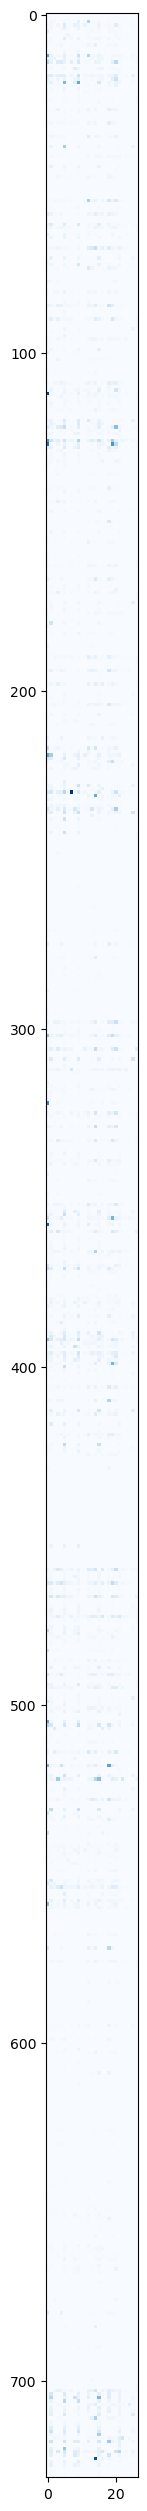

In [172]:
plt.figure(figsize = (32,32))
plt.imshow(T,cmap = 'Blues')


In [182]:
## Model smoothing
P = (T+1).float()
P /= P.sum(1, keepdim=True)
P

tensor([[0.0370, 0.0370, 0.0370,  ..., 0.0370, 0.0370, 0.0370],
        [0.0270, 0.0270, 0.0270,  ..., 0.0270, 0.0270, 0.0270],
        [0.0123, 0.0614, 0.0516,  ..., 0.0025, 0.0147, 0.0025],
        ...,
        [0.0263, 0.0263, 0.0263,  ..., 0.0263, 0.0526, 0.0263],
        [0.0185, 0.2037, 0.0185,  ..., 0.0185, 0.0185, 0.0185],
        [0.0132, 0.1447, 0.0132,  ..., 0.0132, 0.1053, 0.0132]])

In [183]:


i = 0


for x in range(50):
    out = []
    while True:
        p = P[i]
        i = torch.multinomial(p,num_samples = 1, replacement=True).item()
        out.append(itos[i])
        if i==0: 
            break
    print(''.join(out))

dve.
odutelpedmblss.
wki.
gioae.
ozirer.
crd.
pederistincedinnibaxiphiutidistrbldte.
olll.
jo.
qunt.
kectodinterbleckiblll.
nnintiscawnismphywnazeofcid.
wxmill.
xidimaqd.
jfnt.
de.
govaql.
oqpyffeditephuge.
powotaywn.
y.
isosss.
axllemphsinderbthmykejombnipte.
yi.
dvntisirykirbbll.
rit.
tini.
py.
zahijzaw.
n.
yrin.
l.
zmninswtitirdil.
sage.
yd.
utelllvatinchemysti.
phtkiwncr.
tekul.
mofames.
msisouragijqginjzomxemninse.
unickero.
ho.
.
qampoohhe.
xidwqqua.
vephe.
ncteafojvintincblxin.
e.
kiniyte.
bidoelillthl.
ysafte.


In [189]:
log_likelyhood = 0.0
n = 0

for w in train:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        double = ch1 + ch2
        ix1 = dualstoi[double]
        ix2 = stoi[ch3]
    
        prob = P[ix1,ix2]
        log_likelyhood += torch.log(prob)
        logprob = torch.log(prob)
        n+= 1
#         print(f'{ch1}{ch2}: {prob:4f}: {logprob:4f}')

        
# print(log_likelyhood)
nll = -log_likelyhood
normnll = nll/n


In [190]:
normnll.item()

2.237677812576294